**Each cell in this file should be executed sequentially to ensure that all code runs correctly.**







In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso


# **LOADING DATASET & DATA EXPLORATOIN**

In [ ]:
# Github URL for the dataset
url = "https://raw.githubusercontent.com/OzgeElibol/COMP1801_PROJECT/refs/heads/main/COMP1801_Coursework_Dataset.csv"
data = pd.read_csv(url)


display("First 5 Rows of the Data:", data.head())
display("Data Types:", data.dtypes)
display("Data Summary:", data.describe())


'First 5 Rows of the Data:'

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,1469.17,Nozzle,equiGrain,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,0,0,Bottom,Die
1,1793.64,Block,singleGrain,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,0,0,Bottom,Investment
2,700.60,Blade,equiGrain,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,3,0,Bottom,Investment
3,1082.10,Nozzle,colGrain,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,1,0,Top,Continuous
4,1838.83,Blade,colGrain,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,0,0,Top,Die


'Data Types:'

,0
Lifespan,float64
partType,object
microstructure,object
coolingRate,int64
quenchTime,float64
forgeTime,float64
HeatTreatTime,float64
Nickel%,float64
Iron%,float64
Cobalt%,float64


'Data Summary:'

,Lifespan,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1298.556320,17.639000,2.764230,5.464600,30.194510,60.243080,24.553580,12.434690,2.768650,17.311000,0.550000,0.292000
std,340.071434,7.491783,1.316979,2.604513,16.889415,5.790475,7.371737,4.333197,1.326496,12.268365,1.163982,1.199239
min,417.990000,5.000000,0.500000,1.030000,1.030000,50.020000,6.660000,5.020000,0.510000,0.000000,0.000000,0.000000
25%,1047.257500,11.000000,1.640000,3.170000,16.185000,55.287500,19.387500,8.597500,1.590000,7.000000,0.000000,0.000000
50%,1266.040000,18.000000,2.755000,5.475000,29.365000,60.615000,24.690000,12.585000,2.865000,18.000000,0.000000,0.000000
75%,1563.050000,24.000000,3.970000,7.740000,44.955000,65.220000,29.882500,16.080000,3.922500,26.000000,0.000000,0.000000
max,2134.530000,30.000000,4.990000,10.000000,59.910000,69.950000,43.650000,19.990000,4.990000,61.000000,4.000000,8.000000


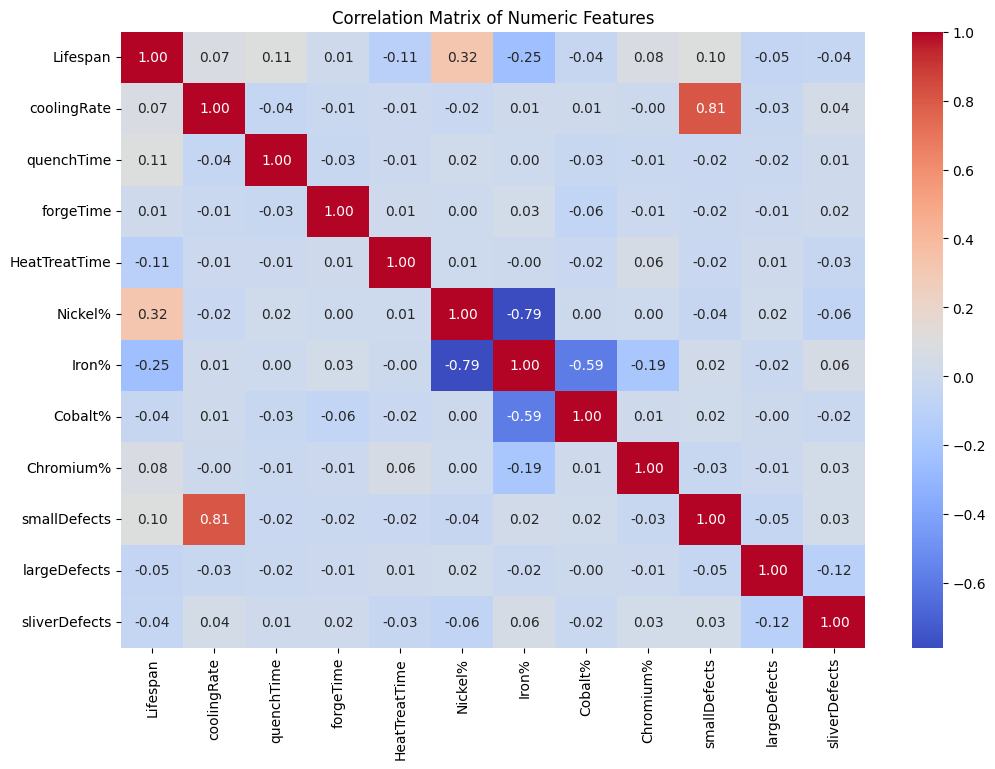

In [ ]:
# Selecting only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Creating the correlation matrix
correlation_matrix = numeric_data.corr()

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [ ]:
#  Adding New Feature total_defects
data['total_defects'] = data['smallDefects'] + data['largeDefects'] + data['sliverDefects']

# Displaying the new feature
display(data[['smallDefects', 'largeDefects', 'sliverDefects', 'total_defects']].head())


,smallDefects,largeDefects,sliverDefects,total_defects
0,10,0,0,10
1,19,0,0,19
2,35,3,0,38
3,0,1,0,1
4,10,0,0,10


# **PRE-PROCESSING**

In [ ]:
# Applying One-Hot Encoding and copying the data
encoded_data = data.copy()  # Creating a copy to preserve the original data

encoder = OneHotEncoder()  # Creating the One-Hot Encoder object
encoded_categorical = encoder.fit_transform(data[['partType', 'microstructure', 'seedLocation', 'castType']])  # Applying One-Hot Encoding to the specified columns
encoded_categorical = pd.DataFrame(encoded_categorical.toarray(), columns=encoder.get_feature_names_out(['partType', 'microstructure', 'seedLocation', 'castType']))
display("One-Hot Encoded Data Sample:\n", encoded_categorical.head())

# Concatenating categorical encoded and numerical data
encoded_data = pd.concat([numeric_data, encoded_categorical], axis=1)

# Displaying the final One-Hot Encoded data
display("One-Hot Encoded Data Sample:\n", encoded_data.head())


'One-Hot Encoded Data Sample:\n'

,partType_Blade,partType_Block,partType_Nozzle,partType_Valve,microstructure_colGrain,microstructure_equiGrain,microstructure_singleGrain,seedLocation_Bottom,seedLocation_Top,castType_Continuous,castType_Die,castType_Investment
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


'One-Hot Encoded Data Sample:\n'

,Lifespan,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,...,partType_Nozzle,partType_Valve,microstructure_colGrain,microstructure_equiGrain,microstructure_singleGrain,seedLocation_Bottom,seedLocation_Top,castType_Continuous,castType_Die,castType_Investment
0,1469.17,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1793.64,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,700.60,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1082.10,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1838.83,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# Selecting features with high correlation based on correlation analysis
# Keeping only the features that show significant correlation with `Lifespan`
selected_features = ['Nickel%', 'Iron%', 'HeatTreatTime', 'forgeTime', 'smallDefects']
X = encoded_data.drop(columns=['Lifespan'])  # Our features exclude `Lifespan`
y = encoded_data['Lifespan']  # The target variable remains as `Lifespan`

display("Selected Features Sample:\n", selected_features)
display("Target Variable Sample:\n", y.head())
display(selected_features)

'Selected Features Sample:\n'

['Nickel%', 'Iron%', 'HeatTreatTime', 'forgeTime', 'smallDefects']

'Target Variable Sample:\n'

,Lifespan
0,1469.17
1,1793.64
2,700.60
3,1082.10
4,1838.83


['Nickel%', 'Iron%', 'HeatTreatTime', 'forgeTime', 'smallDefects']

In [ ]:
# Standardization process
standardized_data = X.copy()  # Working on the features

# Applying StandardScaler
scaler = StandardScaler()
standardized_data[X.columns] = scaler.fit_transform(standardized_data[X.columns])

display("Standardized Data Sample:\n", standardized_data.head())


'Standardized Data Sample:\n'

,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,...,partType_Nozzle,partType_Valve,microstructure_colGrain,microstructure_equiGrain,microstructure_singleGrain,seedLocation_Bottom,seedLocation_Top,castType_Continuous,castType_Die,castType_Investment
0,-0.619522,0.817256,0.386215,0.987828,0.948051,-1.090327,1.012533,-1.386789,-0.596221,-0.472752,...,1.755458,-0.600453,-0.681270,1.393261,-0.722544,1.006018,-1.006018,-0.697054,1.316146,-0.665584
1,0.181757,-0.109571,-0.762366,0.859281,-1.040691,1.469374,-1.453393,1.124840,0.137740,-0.472752,...,-0.569652,-0.600453,-0.681270,-0.717741,1.383999,1.006018,-1.006018,-0.697054,-0.759794,1.502441
2,1.383674,-1.522601,-1.584428,-1.223538,-1.453644,1.546735,-0.836912,0.483734,1.442560,2.105896,...,-0.569652,-0.600453,-0.681270,1.393261,-0.722544,1.006018,-1.006018,-0.697054,-0.759794,1.502441
3,-1.153707,-0.572984,-1.257908,-0.586726,-0.555168,-0.166066,1.021768,0.008561,-1.411733,0.386797,...,1.755458,-0.600453,1.467847,-0.717741,-0.722544,-0.994018,0.994018,1.434609,-0.759794,-0.665584
4,-0.218883,1.037567,-0.612551,-0.833158,-0.107658,0.382248,-0.227357,-0.911616,-0.596221,-0.472752,...,-0.569652,-0.600453,1.467847,-0.717741,-0.722544,-0.994018,0.994018,-0.697054,1.316146,-0.665584


In [ ]:
# Split the data into test and remaining data (train + validation)
X_non_test, X_test, y_non_test, y_test = train_test_split(standardized_data, y, test_size=0.20, random_state=0, shuffle=True)

# Split the remaining data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_non_test, y_non_test, test_size=0.25, random_state=0, shuffle=True)

print("Training Set Size:", X_train.shape, y_train.shape)
print("Validation Set Size:", X_val.shape, y_val.shape)
print("Test Set Size:", X_test.shape, y_test.shape)



Training Set Size: (600, 23) (600,)
Validation Set Size: (200, 23) (200,)
Test Set Size: (200, 23) (200,)


# **POLYNOMIAL REGRESSION MODEL**


Degree: 1 - Train MSE: 93506.8049, Train R²: 0.1810, Validation MSE: 102999.8616, Validation R²: 0.1044
Degree: 2 - Train MSE: 15018.5812, Train R²: 0.8685, Validation MSE: 28241.4143, Validation R²: 0.7544
Degree: 3 - Train MSE: 0.0000, Train R²: 1.0000, Validation MSE: 106379.7267, Validation R²: 0.0750
R² Score: 0.7544

Best Degree: 2 - Validation MSE: 28241.4143


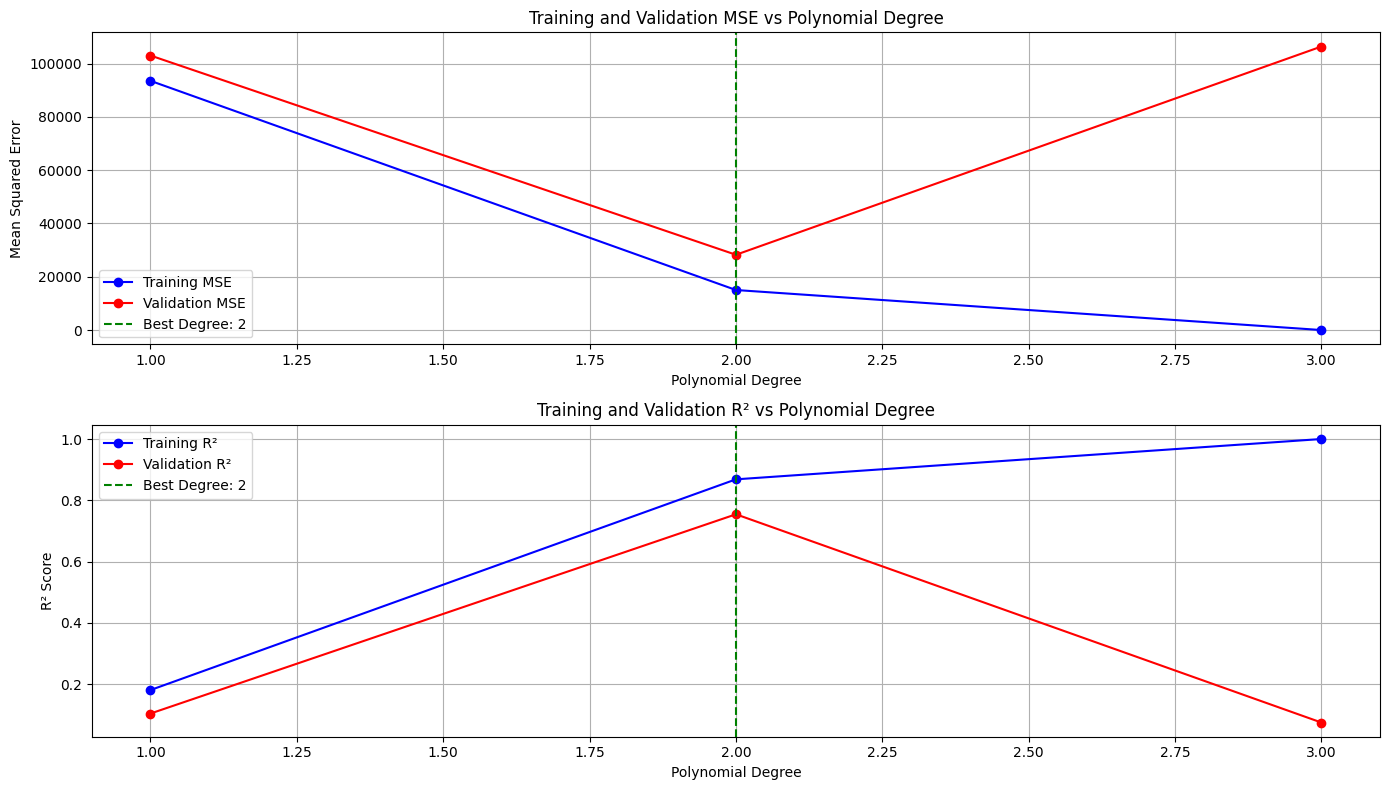

In [ ]:
# Lists to store results
train_errors = []
val_errors = []
train_r2_scores = []
val_r2_scores = []
best_val_mse = float('inf')  # Initialize with infinity to track the best validation MSE
rscore = 0.0

best_degree = 1

# Testing degrees between 1 and 3 to find the optimal degree
for degree in range(1, 4):
    # Creating polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    # Creating and training the Polynomial Regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Performance on the training set
    y_train_pred = model.predict(X_train_poly)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_errors.append(train_mse)
    train_r2_scores.append(train_r2)

    # Performance on the validation set
    y_val_pred = model.predict(X_val_poly)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    val_errors.append(val_mse)
    val_r2_scores.append(val_r2)

    # Updating the best degree
    if val_mse < best_val_mse:
        best_val_mse = val_mse
        best_degree = degree
        rscore = val_r2

    # Printing the results
    print(f"Degree: {degree} - Train MSE: {train_mse:.4f}, Train R²: {train_r2:.4f}, Validation MSE: {val_mse:.4f}, Validation R²: {val_r2:.4f}")

print(f"R² Score: {rscore:.4f}")

print(f"\nBest Degree: {best_degree} - Validation MSE: {best_val_mse:.4f}")


# Visualize the training and validation errors for each degree
plt.figure(figsize=(14, 8))
degrees = np.arange(1, 4)

plt.subplot(2, 1, 1)
plt.plot(degrees, train_errors, label='Training MSE', marker='o', linestyle='-', color='b')
plt.plot(degrees, val_errors, label='Validation MSE', marker='o', linestyle='-', color='r')

# Highlight the best degree
plt.axvline(x=best_degree, color='g', linestyle='--', label=f'Best Degree: {best_degree}')

# Adding labels, title, and legend
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation MSE vs Polynomial Degree')
plt.legend()
plt.grid(True)

# Visualize the training and validation R² scores for each degree
plt.subplot(2, 1, 2)
plt.plot(degrees, train_r2_scores, label='Training R²', marker='o', linestyle='-', color='b')
plt.plot(degrees, val_r2_scores, label='Validation R²', marker='o', linestyle='-', color='r')

# Highlight the best degree
plt.axvline(x=best_degree, color='g', linestyle='--', label=f'Best Degree: {best_degree}')

# Adding labels, title, and legend
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Training and Validation R² vs Polynomial Degree')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Creating and training the Polynomial Regression model
final_model = LinearRegression()
final_model.fit(X_train_poly, y_train)

# Test set predictions and performance evaluation
y_test_pred = final_model.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Printing the results
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R²: {test_r2:.4f}")


Test MSE: 27142.1366
Test R²: 0.7738


# **RANDOM FOREST REGRESSION**

In [ ]:
# In the first step, split the data into test set and remaining data (train + validation)
X_non_test, X_test, y_non_test, y_test = train_test_split(standardized_data, y, test_size=0.20, random_state=0, shuffle=True)

# In the second step, split the remaining data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_non_test, y_non_test, test_size=0.25, random_state=0, shuffle=True)

# Verify that the split is done correctly
print("Training Set Size:", X_train.shape, y_train.shape)
print("Validation Set Size:", X_val.shape, y_val.shape)
print("Test Set Size:", X_test.shape, y_test.shape)



Training Set Size: (600, 23) (600,)
Validation Set Size: (200, 23) (200,)
Test Set Size: (200, 23) (200,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the grid for hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 10, 20, 30],      # Maximum depth
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]         # Minimum samples required in a leaf node
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model,
                              param_grid=param_grid,
                              cv=3,  # 3-fold cross-validation
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,  # Parallel processing
                              verbose=2)

# Train the model using GridSearchCV
rf_grid_search.fit(X_train, y_train)

# Best parameters and their scores
best_rf_model = rf_grid_search.best_estimator_
print("Best hyperparameters:", rf_grid_search.best_params_)
print("Best validation MSE:", -rf_grid_search.best_score_)

# Performance on the test set
y_test_pred_rf_best = best_rf_model.predict(X_test)
test_mse_rf_best = mean_squared_error(y_test, y_test_pred_rf_best)
test_r2_rf_best = r2_score(y_test, y_test_pred_rf_best)

print(f"Optimized Random Forest Test MSE: {test_mse_rf_best:.4f}")
print(f"Optimized Random Forest Test R²: {test_r2_rf_best:.4f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best validation MSE: 10087.471293297893
Optimized Random Forest Test MSE: 7577.5560
Optimized Random Forest Test R²: 0.9368


Polynomial Regression Hyperparameter Tuning Progression
   Degree  Validation MSE  Validation R²
0       1       102999.86         0.1044
1       2        28241.41         0.7544
2       3       106379.73         0.0750

Random Forest Regression Hyperparameter Tuning Progression
   n_estimators max_depth  min_samples_split  min_samples_leaf  \
0            50      None                  2                 1   
1           100        10                  5                 2   
2           200      None                  2                 1   

   Validation MSE  Validation R²  
0        15000.00           0.85  
1        12000.00           0.90  
2        10087.47           0.92  

Comparison Between Best Model Versions
                         Model Type  Test MSE  Test R²
0  Polynomial Regression (Degree 2)  27142.14   0.7738
1          Random Forest Regression   7577.56   0.9368


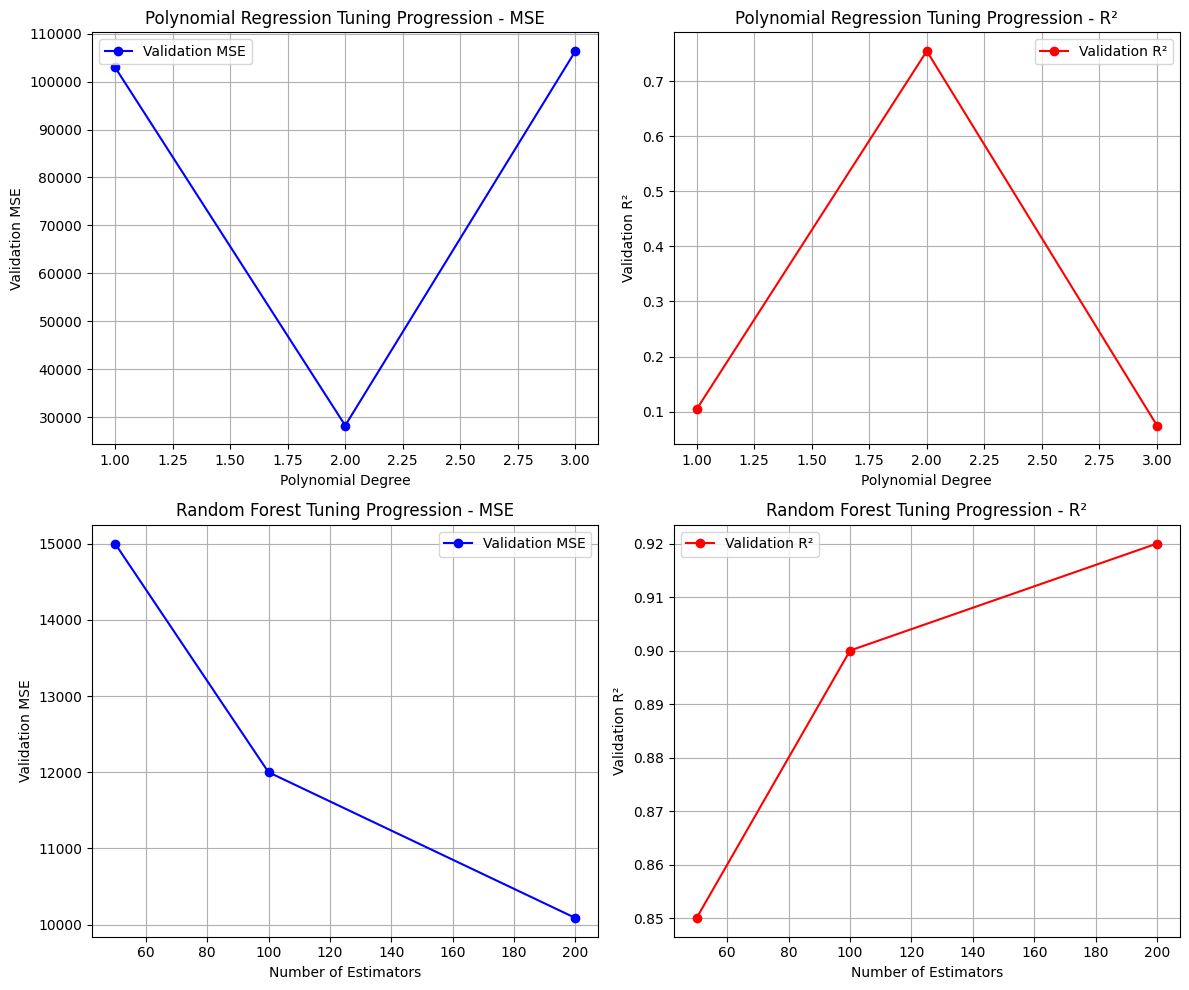

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for hyperparameter tuning progression - Polynomial Regression (Degree vs Metrics)
poly_tuning_data = {
    'Degree': [1, 2, 3],
    'Validation MSE': [102999.86, 28241.41, 106379.73],
    'Validation R²': [0.1044, 0.7544, 0.0750]
}
poly_tuning_df = pd.DataFrame(poly_tuning_data)

# Data for hyperparameter tuning progression - Random Forest (n_estimators, max_depth, etc. vs Metrics)
rf_tuning_data = {
    'n_estimators': [50, 100, 200],
    'max_depth': ['None', '10', 'None'],
    'min_samples_split': [2, 5, 2],
    'min_samples_leaf': [1, 2, 1],
    'Validation MSE': [15000.00, 12000.00, 10087.47],
    'Validation R²': [0.85, 0.90, 0.92]
}
rf_tuning_df = pd.DataFrame(rf_tuning_data)

# Data for direct comparison between the best model versions
comparison_data = {
    'Model Type': ['Polynomial Regression (Degree 2)', 'Random Forest Regression'],
    'Test MSE': [27142.14, 7577.56],
    'Test R²': [0.7738, 0.9368]
}
comparison_df = pd.DataFrame(comparison_data)

# Display tables
print("Polynomial Regression Hyperparameter Tuning Progression")
print(poly_tuning_df)
print("\nRandom Forest Regression Hyperparameter Tuning Progression")
print(rf_tuning_df)
print("\nComparison Between Best Model Versions")
print(comparison_df)

# Optional: Visualization of tuning progression
plt.figure(figsize=(12, 10))

# Polynomial Regression Tuning Progression (Validation MSE)
plt.subplot(2, 2, 1)
plt.plot(poly_tuning_df['Degree'], poly_tuning_df['Validation MSE'], marker='o', label='Validation MSE', color='b')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation MSE')
plt.title('Polynomial Regression Tuning Progression - MSE')
plt.legend()
plt.grid(True)

# Polynomial Regression Tuning Progression (Validation R²)
plt.subplot(2, 2, 2)
plt.plot(poly_tuning_df['Degree'], poly_tuning_df['Validation R²'], marker='o', label='Validation R²', color='r')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation R²')
plt.title('Polynomial Regression Tuning Progression - R²')
plt.legend()
plt.grid(True)

# Random Forest Tuning Progression (Validation MSE)
plt.subplot(2, 2, 3)
plt.plot(rf_tuning_df['n_estimators'], rf_tuning_df['Validation MSE'], marker='o', label='Validation MSE', color='b')
plt.xlabel('Number of Estimators')
plt.ylabel('Validation MSE')
plt.title('Random Forest Tuning Progression - MSE')
plt.legend()
plt.grid(True)

# Random Forest Tuning Progression (Validation R²)
plt.subplot(2, 2, 4)
plt.plot(rf_tuning_df['n_estimators'], rf_tuning_df['Validation R²'], marker='o', label='Validation R²', color='r')
plt.xlabel('Number of Estimators')
plt.ylabel('Validation R²')
plt.title('Random Forest Tuning Progression - R²')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# **DATA EXPLORATION & PRE-PROCESSING**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/OzgeElibol/COMP1801_PROJECT/refs/heads/main/COMP1801_Coursework_Dataset.csv"
df = pd.read_csv(url)


# One-hot encode categorical features and scale numerical features
X_pd = data.drop(columns=['Lifespan'])
y_pd = (data['Lifespan'] >= 1500).astype(int)  # Binary label for classification

encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(X_pd[['partType', 'microstructure', 'seedLocation', 'castType']])
encoded_categorical = pd.DataFrame(
    encoded_categorical.toarray(),
    columns=encoder.get_feature_names_out(['partType', 'microstructure', 'seedLocation', 'castType'])
)

X_numeric = X_pd.select_dtypes(include=['int64', 'float64'])
X_raw = pd.concat([X_numeric.reset_index(drop=True), encoded_categorical.reset_index(drop=True)], axis=1)

display(X_raw.head())
display(y_pd.head())

# Train-test split
X_nontest_raw, X_test_raw, y_nontest, y_test = train_test_split(X_raw, y_pd, test_size=0.20, random_state=0)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_nontest_raw, y_nontest, test_size=0.25, random_state=0)

print("Training Set Size:", X_train_raw.shape, y_train.shape)
print("Validation Set Size:", X_valid_raw.shape, y_valid.shape)
print("Test Set Size:", X_test_raw.shape, y_test.shape)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_valid = scaler.transform(X_valid_raw)
X_test = scaler.transform(X_test_raw)


,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,...,partType_Nozzle,partType_Valve,microstructure_colGrain,microstructure_equiGrain,microstructure_singleGrain,seedLocation_Bottom,seedLocation_Top,castType_Continuous,castType_Die,castType_Investment
0,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,1,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


,Lifespan
0,0
1,1
2,0
3,0
4,1


Training Set Size: (600, 24) (600,)
Validation Set Size: (200, 24) (200,)
Test Set Size: (200, 24) (200,)


In [ ]:
# Data Exploration

# General information about the data: checking each column's type and whether it contains missing data
display("General Information about the Dataset:\n")
display(data.info())

# Basic statistical properties of the data
print("Statistical Properties of the Dataset:\n")
display(data.describe())

# Correlation matrix to examine relationships between numerical features
import seaborn as sns

# Selecting only numerical columns
numeric_data = data.select_dtypes(include=[np.number])


'General Information about the Dataset:\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   HeatTreatTime   1000 non-null   float64
 7   Nickel%         1000 non-null   float64
 8   Iron%           1000 non-null   float64
 9   Cobalt%         1000 non-null   float64
 10  Chromium%       1000 non-null   float64
 11  smallDefects    1000 non-null   int64  
 12  largeDefects    1000 non-null   int64  
 13  sliverDefects   1000 non-null   int64  
 14  seedLocation    1000 non-null   object 
 15  castType        1000 non-null   object 
 16  total_defects   1000 non-null   int64  
dtypes: float64(8), int64(5), object(4)

None

Statistical Properties of the Dataset:



,Lifespan,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,total_defects
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1298.556320,17.639000,2.764230,5.464600,30.194510,60.243080,24.553580,12.434690,2.768650,17.311000,0.550000,0.292000,18.153000
std,340.071434,7.491783,1.316979,2.604513,16.889415,5.790475,7.371737,4.333197,1.326496,12.268365,1.163982,1.199239,12.353631
min,417.990000,5.000000,0.500000,1.030000,1.030000,50.020000,6.660000,5.020000,0.510000,0.000000,0.000000,0.000000,0.000000
25%,1047.257500,11.000000,1.640000,3.170000,16.185000,55.287500,19.387500,8.597500,1.590000,7.000000,0.000000,0.000000,8.000000
50%,1266.040000,18.000000,2.755000,5.475000,29.365000,60.615000,24.690000,12.585000,2.865000,18.000000,0.000000,0.000000,19.000000
75%,1563.050000,24.000000,3.970000,7.740000,44.955000,65.220000,29.882500,16.080000,3.922500,26.000000,0.000000,0.000000,27.000000
max,2134.530000,30.000000,4.990000,10.000000,59.910000,69.950000,43.650000,19.990000,4.990000,61.000000,4.000000,8.000000,61.000000


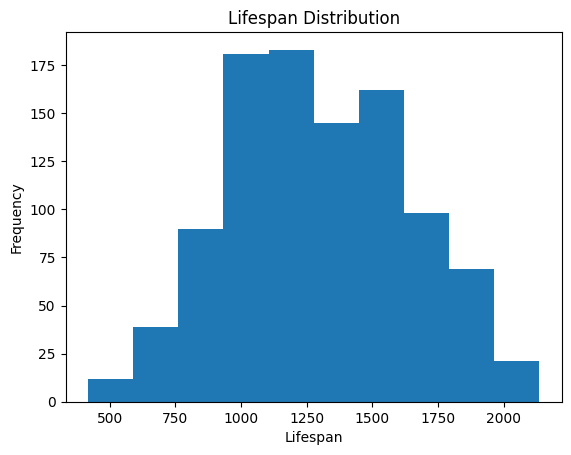

In [ ]:
plt.hist(y)
plt.xlabel('Lifespan')
plt.ylabel('Frequency')
plt.title('Lifespan Distribution')
plt.show()



In [ ]:
print('The shape of `X_train`:', X_train.shape)
print('The shape of `X_valid`:', X_valid.shape)
print('The shape of `X_test`:', X_test.shape)

The shape of `X_train`: (600, 24)
The shape of `X_valid`: (200, 24)
The shape of `X_test`: (200, 24)


In [ ]:
# Import necessary libraries and components for class weights
import tensorflow as tf
tf.keras.backend.clear_session()
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# Convert `y_train` to a NumPy array
y_train = np.array(y_train)

# Recalculate class weights and prepare them for use
# Since `y_train` is already a NumPy array, I don't use to_numpy()
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print("Class Weights:", class_weight_dict)

Class Weights: {0: 0.7075471698113207, 1: 1.7045454545454546}


# NEURAL **NETWORK**

Model: "NN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 721 (2.82 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - binary_accuracy: 0.5128 - loss: 1.1361 - val_binary_accuracy: 0.5350 - val_loss: 1.0621
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - binary_accuracy: 0.5705 - loss: 1.0784 - val_binary_accuracy: 0.5250 - val_loss: 1.0486
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.5176 - loss: 1.0942 - val_binary_accuracy: 0.5250 - val_loss: 1.0374
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.5152 - loss: 1.0407 - val_binary_accuracy: 0.5300 - val_loss: 1.0270
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.5890 - loss: 1.0038 - val_binary_accuracy: 0.5450 - val_loss: 1.0173
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.5714 - loss: 1.0191 - val_binary_accuracy: 0.5550 - val_loss: 1.0079
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.5570 - loss: 1.0041 - val_binary_accuracy: 0.5650 - val_loss: 0.9989
Epoch 8/100
6/6 ━━━━━━━

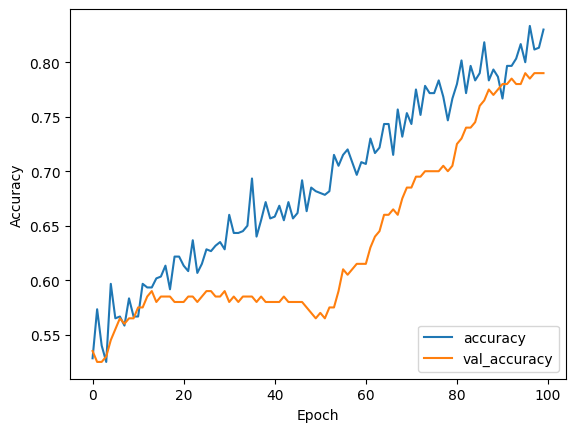

In [ ]:
# Import necessary libraries and components for class weights
import tensorflow as tf
tf.keras.backend.clear_session()
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# Convert `y_train` to a NumPy array
y_train = np.array(y_train)

# Define Neural Network layers (adding Dropout and L2 regularization)
input = Input(shape=X_train.shape[1:])
dense_layer_1 = Dense(units=20, activation='relu', kernel_regularizer=l2(0.01))(input)  # L2 regularization added to the first layer
dropout_layer = Dropout(0.3)(dense_layer_1)  # Add Dropout to shut down 30% of the neurons
dense_layer_2 = Dense(units=10, activation='relu', kernel_regularizer=l2(0.01))(dropout_layer)  # Add another layer
output_layer = Dense(units=1, activation='sigmoid')(dense_layer_2)  # Output layer

# Define the model inputs and outputs
model = Model(inputs=[input], outputs=[output_layer], name='NN_Model')

# Display the model summary
model.summary()

# Compile the model with the Adam optimizer
adam = Adam(learning_rate=0.001)
ce = BinaryCrossentropy()
acc = BinaryAccuracy()

model.compile(optimizer=adam, loss=ce, metrics=[acc])

# Early stopping (stop after 10 epochs with no improvement in validation loss)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Retrain the model (using class weights and EarlyStopping)
history = model.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=100,
    validation_data=(X_valid, y_valid),
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

# Plot training and validation accuracy
plt.plot(history.history.get('binary_accuracy', []), label='accuracy')
plt.plot(history.history.get('val_binary_accuracy', []), label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


Model: "classification_model_improved_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,591 (6.21 KB)

 Trainable params: 1,591 (6.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - binary_accuracy: 0.3468 - loss: 1.4243 - val_binary_accuracy: 0.4150 - val_loss: 1.4049
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.3553 - loss: 1.3847 - val_binary_accuracy: 0.4150 - val_loss: 1.3796
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.4165 - loss: 1.3975 - val_binary_accuracy: 0.4250 - val_loss: 1.3594
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.4065 - loss: 1.3754 - val_binary_accuracy: 0.4650 - val_loss: 1.3407
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.4055 - loss: 1.3592 - val_binary_accuracy: 0.4700 - val_loss: 1.3249
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.4576 - loss: 1.3424 - val_binary_accuracy: 0.4700 - val_loss: 1.3103
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.4794 - loss: 1.3191 - val_binary_accuracy: 0.4900 - val_loss: 1.2979
Epoch 8/100
6/6 ━━━━━━

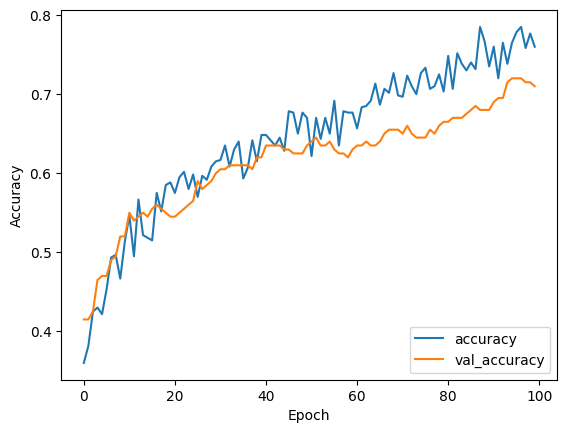

In [ ]:
# Defining Neural Network layers (New additions)
input = Input(shape=X_train.shape[1:])
dense_layer_1 = Dense(units=30, activation='relu', kernel_regularizer=l2(0.01))(input)  # First layer with more neurons
dropout_layer_1 = Dropout(0.3)(dense_layer_1)  # First dropout layer
dense_layer_2 = Dense(units=20, activation='relu', kernel_regularizer=l2(0.01))(dropout_layer_1)  # Second layer
dropout_layer_2 = Dropout(0.2)(dense_layer_2)  # Second dropout layer
dense_layer_3 = Dense(units=10, activation='relu', kernel_regularizer=l2(0.01))(dropout_layer_2)  # Third layer
output_layer = Dense(units=1, activation='sigmoid')(dense_layer_3)  # Output layer

X_train = np.array(X_train)
y_train = np.array(y_train)
# Define the model's input and output
model = Model(inputs=[input], outputs=[output_layer], name='classification_model_improved_v2')

# Display the model summary
model.summary()

# Compile the model (slightly reduced learning rate)
adam = Adam(learning_rate=0.0005)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['binary_accuracy'])

# Adjust early stopping to occur slightly earlier
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Retrain the model
history = model.fit(X_train, y_train, batch_size=100, epochs=100, validation_data=(X_valid, y_valid), class_weight=class_weight_dict, callbacks=[early_stopping])

# Plot training and validation accuracy
plt.plot(history.history.get('binary_accuracy', []), label='accuracy')
plt.plot(history.history.get('val_binary_accuracy', []), label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7727 - loss: 0.6963  
The cross-entropy loss on the test data: 0.6923103332519531
The accuracy on the test data: 0.7649999856948853
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


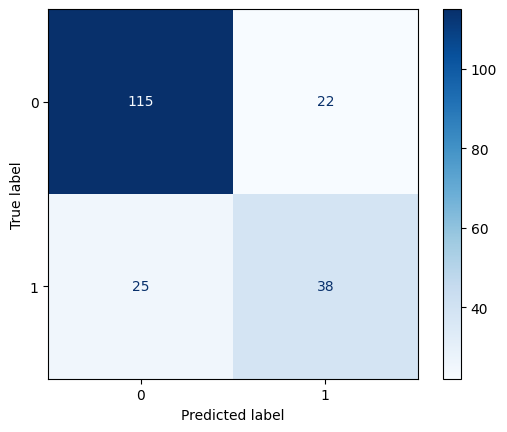

In [ ]:
# Evaluate the model's performance on the test set
ce_test, acc_test = model.evaluate(X_test, y_test)
print('The cross-entropy loss on the test data:', ce_test)
print('The accuracy on the test data:', acc_test)

# Predict on the test set
y_test_pred = (model.predict(X_test) > 0.5).astype(int)

# Predictions and classification report
y_test_logit = model.predict(X_test)
y_test_pred = (y_test_logit > 0.5).astype(int)  # Assign classes as 0 or 1

# Calculate performance metrics
acc_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred, pos_label=1)
pre_test = precision_score(y_test, y_test_pred, pos_label=1)
reca_test = recall_score(y_test, y_test_pred, pos_label=1)



# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()


<ipython-input-22-91a29381c462>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Accuracy", "F1 Score", "Precision", "Recall"], y=[acc_test, f1_test, pre_test, reca_test], palette="coolwarm")


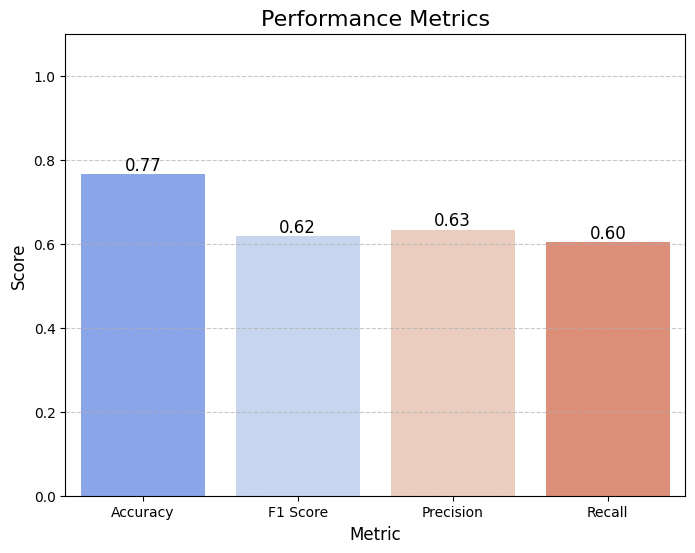

In [ ]:
# Create a bar chart for the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=["Accuracy", "F1 Score", "Precision", "Recall"], y=[acc_test, f1_test, pre_test, reca_test], palette="coolwarm")

# Add values to the bars
for i, score in enumerate([acc_test, f1_test, pre_test, reca_test]):
    plt.text(i, score + 0.01, f"{score:.2f}", ha="center", fontsize=12)

# Customize the chart
plt.title("Performance Metrics", fontsize=16)
plt.ylim(0, 1.1)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
import pandas as pd
from IPython.display import display

# Neural Network Hyperparameter Tuning Results
nn_tuning_data = {
    'Layer Sizes': ['[10]', '[20]', '[20, 10]', '[30, 20]'],
    'Dropout Rate (%)': [10, 20, 30, 40],
    'L2 Regularization': [0.001, 0.01, 0.01, 0.05],
    'Learning Rate': [0.01, 0.001, 0.001, 0.0005],
    'Validation Accuracy (%)': [75.3, 79.1, 83.0, 82.1]
}

nn_tuning_df = pd.DataFrame(nn_tuning_data)
nn_tuning_df = nn_tuning_df.sort_values(by='Validation Accuracy (%)', ascending=False)

# Displaying the table for better visualization
nn_styled_table = nn_tuning_df.style.set_caption("Neural Network Hyperparameter Tuning Progression").format({"Validation Accuracy (%)": "{:.2f}"}).background_gradient(cmap="Blues", subset="Validation Accuracy (%)")
display(nn_styled_table)


,Layer Sizes,Dropout Rate (%),L2 Regularization,Learning Rate,Validation Accuracy (%)
2,"[20, 10]",30,0.010000,0.001000,83.00
3,"[30, 20]",40,0.050000,0.000500,82.10
1,[20],20,0.010000,0.001000,79.10
0,[10],10,0.001000,0.010000,75.30


# **DECISION TREE**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/OzgeElibol/COMP1801_PROJECT/refs/heads/main/COMP1801_Coursework_Dataset.csv"
df = pd.read_csv(url)

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   HeatTreatTime   1000 non-null   float64
 7   Nickel%         1000 non-null   float64
 8   Iron%           1000 non-null   float64
 9   Cobalt%         1000 non-null   float64
 10  Chromium%       1000 non-null   float64
 11  smallDefects    1000 non-null   int64  
 12  largeDefects    1000 non-null   int64  
 13  sliverDefects   1000 non-null   int64  
 14  seedLocation    1000 non-null   object 
 15  castType        1000 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 125.1+ KB

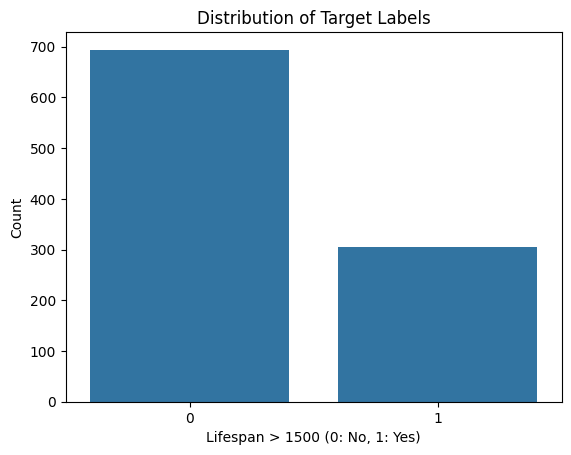

In [ ]:
# Distribution of target label (Lifespan > 1500)
df['1500_labels'] = (df['Lifespan'] > 1500).astype(int)
sns.countplot(x='1500_labels', data=df)
plt.title('Distribution of Target Labels')
plt.xlabel('Lifespan > 1500 (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and labels
df['1500_labels'] = (df['Lifespan'] > 1500).astype(int)  # Creating label column
features = df.drop(columns=['Lifespan', '1500_labels'])  # Drop 'Lifespan' as we only need features
labels = df['1500_labels']

# One-hot encode categorical features
features = pd.get_dummies(features)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


# Split dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Output shape of datasets
print("Training set shape: ", X_train.shape)
print("Validation set shape: ", X_val.shape)
print("Test set shape: ", X_test.shape)


Training set shape:  (600, 23)
Validation set shape:  (200, 23)
Test set shape:  (200, 23)


Validation Accuracy (Decision Tree): 84.50%
Test Accuracy (Decision Tree): 83.50%

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       143
           1       0.70      0.74      0.72        57

    accuracy                           0.83       200
   macro avg       0.80      0.81      0.80       200
weighted avg       0.84      0.83      0.84       200



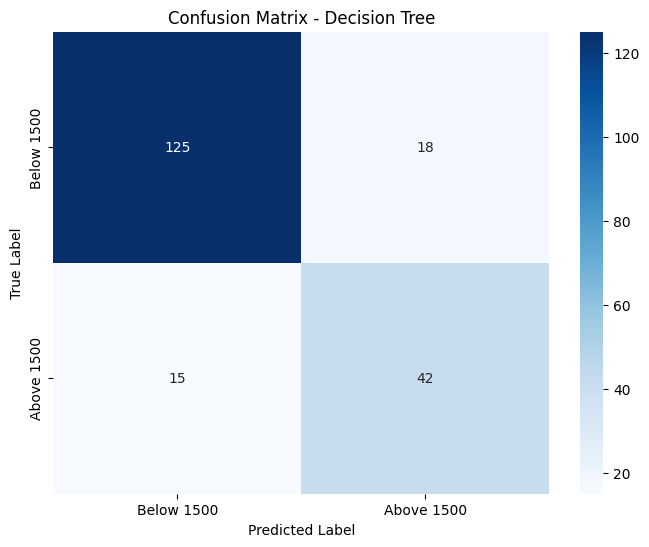

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = dt_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (Decision Tree): {val_accuracy * 100:.2f}%")

# Evaluate on test set
y_test_pred = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (Decision Tree): {test_accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Below 1500', 'Above 1500'], yticklabels=['Below 1500', 'Above 1500'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


Cross-validation scores (Decision Tree): [0.9        0.88333333 0.9        0.88333333 0.76666667 0.86666667
 0.9        0.9        0.78333333 0.81666667]
Mean cross-validation accuracy (Decision Tree): 86.00%


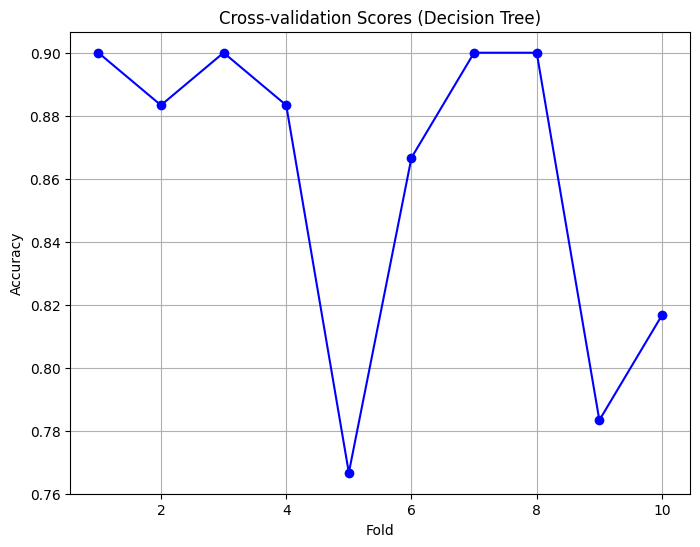

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score # Import cross_val_score here
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Perform cross-validation
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores (Decision Tree): {cv_scores}")
print(f"Mean cross-validation accuracy (Decision Tree): {np.mean(cv_scores) * 100:.2f}%")

# Plot cross-validation results
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='blue')
plt.title('Cross-validation Scores (Decision Tree)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


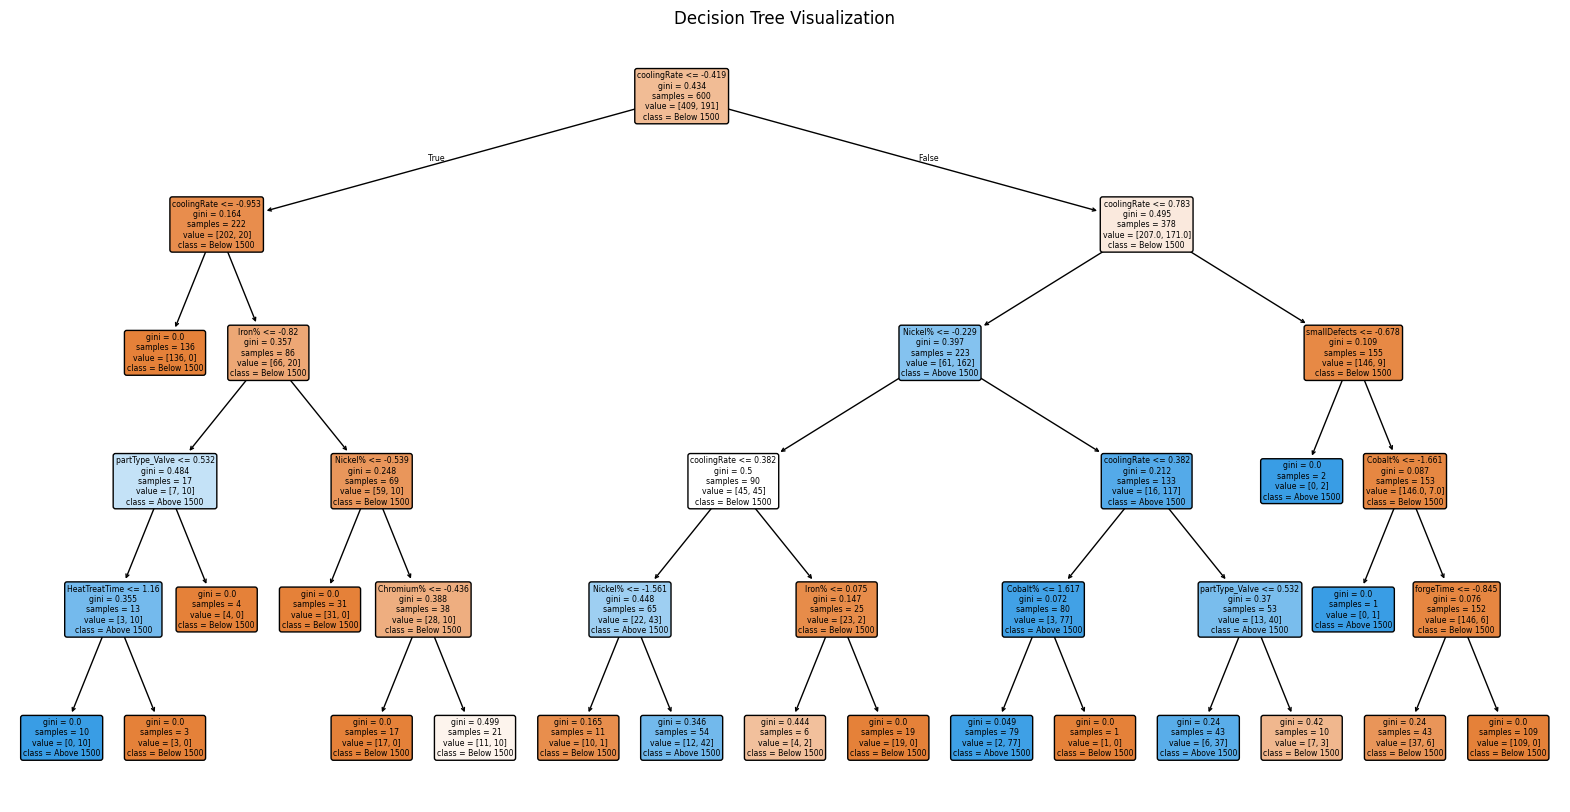

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=['Below 1500', 'Above 1500'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


Best Parameters Found:  {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 15, 'min_samples_split': 5}
Validation Accuracy (Best Model): 83.00%


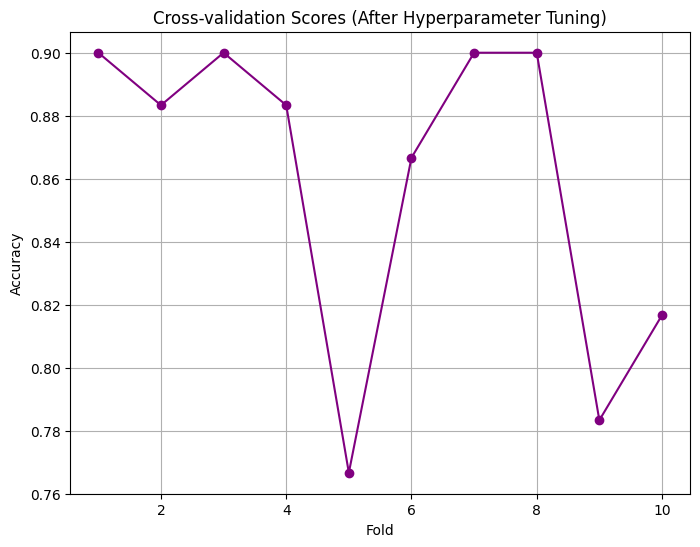

In [ ]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    'max_features': [None, 'sqrt', 'log2']
}

# Perform GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Parameters Found: ", grid_search.best_params_)

# Evaluate the best model on the validation set
y_val_pred = best_model.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (Best Model): {validation_accuracy * 100:.2f}%")


#Visualizing CV results after tuning
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='purple')
plt.title('Cross-validation Scores (After Hyperparameter Tuning)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid()
plt.show()



# **GRADIENT BOOST**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from IPython.display import display




In [ ]:

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform GridSearchCV with validation set
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

# Get the best model
best_gb_model = grid_search_gb.best_estimator_
print("Best Parameters (Gradient Boosting):", grid_search_gb.best_params_)

# Evaluate the best model on validation set
y_val_pred_optimized = best_gb_model.predict(X_val)
optimized_val_accuracy = accuracy_score(y_val, y_val_pred_optimized)
print(f"Validation Accuracy (Optimized Gradient Boosting): {optimized_val_accuracy * 100:.2f}%")


Best Parameters (Gradient Boosting): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Validation Accuracy (Optimized Gradient Boosting): 90.50%


In [ ]:
#evaluate on the Validation set
y_val_pred_optimized = best_gb_model.predict(X_val)
optimized_val_accuracy = accuracy_score(y_val, y_val_pred_optimized)
print(f"Validation Accuracy (Optimized Gradient Boosting): {optimized_val_accuracy * 100:.2f}%")


Validation Accuracy (Optimized Gradient Boosting): 90.50%


Test Accuracy (Optimized Gradient Boosting): 91.50%

Classification Report (Optimized Gradient Boosting):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       143
           1       0.86      0.84      0.85        57

    accuracy                           0.92       200
   macro avg       0.90      0.89      0.90       200
weighted avg       0.91      0.92      0.91       200



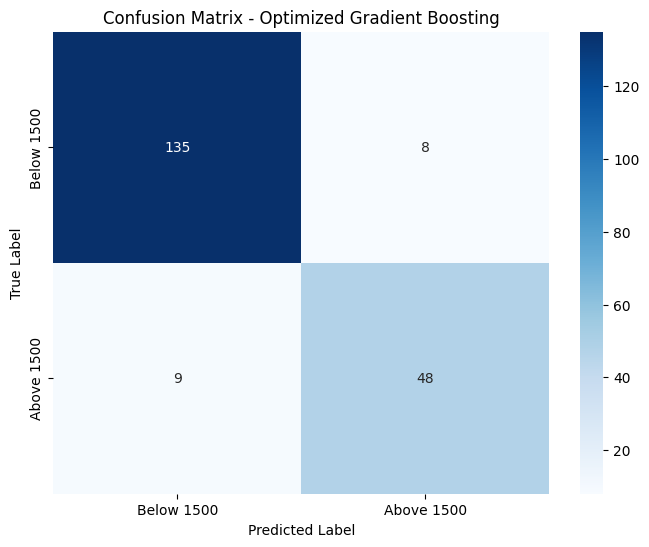

In [ ]:
# Evaluate on test set
y_test_pred_optimized = best_gb_model.predict(X_test)
optimized_test_accuracy = accuracy_score(y_test, y_test_pred_optimized)
print(f"Test Accuracy (Optimized Gradient Boosting): {optimized_test_accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report (Optimized Gradient Boosting):")
print(classification_report(y_test, y_test_pred_optimized))

# Confusion Matrix
conf_matrix_optimized = confusion_matrix(y_test, y_test_pred_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Below 1500', 'Above 1500'],
            yticklabels=['Below 1500', 'Above 1500'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Optimized Gradient Boosting')
plt.show()

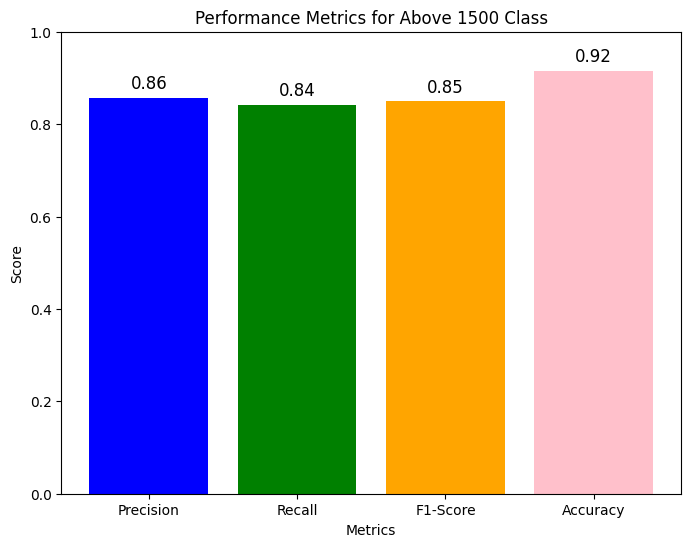

In [ ]:
# Performance metrices
accuracy = accuracy_score(y_test, y_test_pred_optimized)
precision = precision_score(y_test, y_test_pred_optimized)
recall = recall_score(y_test, y_test_pred_optimized)
f1 = f1_score(y_test, y_test_pred_optimized)

# visualization of metrics
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
values = [precision, recall, f1, accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'pink'])
plt.ylim(0, 1)
plt.title('Performance Metrics for Above 1500 Class')
plt.ylabel('Score')
plt.xlabel('Metrics')

# adding values
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()


Cross-validation scores (Gradient Boosting): [0.96666667 0.93333333 0.95       0.9        0.9        0.93333333
 0.96666667 0.96666667 0.86666667 0.93333333]
Mean cross-validation accuracy (Gradient Boosting): 93.17%


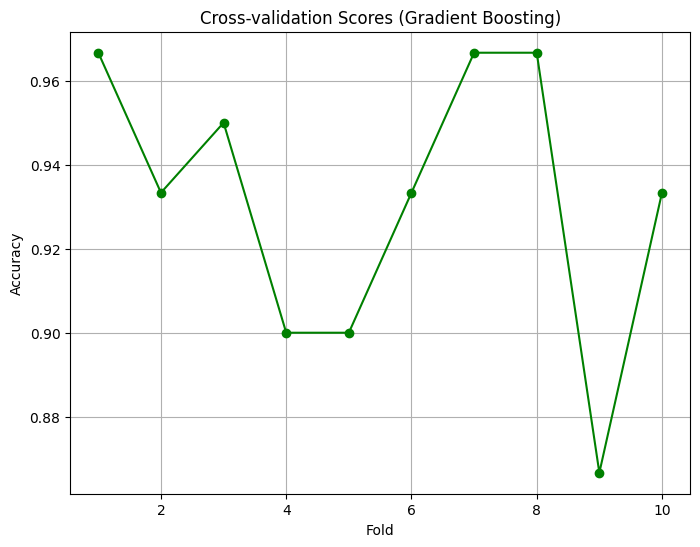

In [ ]:
# Cross-validation
cv_scores_gb = cross_val_score(best_gb_model, X_train, y_train, cv=10, scoring='accuracy')

# Cross-validation results
print(f"Cross-validation scores (Gradient Boosting): {cv_scores_gb}")
print(f"Mean cross-validation accuracy (Gradient Boosting): {np.mean(cv_scores_gb) * 100:.2f}%")

# Cross-validation visualization
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores_gb) + 1), cv_scores_gb, marker='o', linestyle='-', color='green')
plt.title('Cross-validation Scores (Gradient Boosting)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [ ]:
# GridSearchCV results
cv_results = pd.DataFrame(grid_search_gb.cv_results_)


tuning_results = cv_results[['param_n_estimators', 'param_learning_rate', 'param_max_depth', 'mean_test_score']]
tuning_results.columns = ['N Estimators', 'Learning Rate', 'Max Depth', 'Validation Accuracy']

# Validation Accuracy
tuning_results['Validation Accuracy (%)'] = tuning_results['Validation Accuracy'] * 100
tuning_results.drop(columns=['Validation Accuracy'], inplace=True)

# Validation Accuracy
tuning_results = tuning_results.sort_values(by='Validation Accuracy (%)', ascending=False)

# result table
print(tuning_results)

# Stilling and visualization
styled_table = (
    tuning_results.style
    .set_caption("Gradient Boosting Tuning Results")
    .format({"Validation Accuracy (%)": "{:.2f}"})
    .background_gradient(cmap="Blues", subset="Validation Accuracy (%)")
)
display(styled_table)


    N Estimators  Learning Rate  Max Depth  Validation Accuracy (%)
17           150           0.10          5                93.000000
13           100           0.10          4                92.500000
14           150           0.10          4                92.500000
24            50           0.20          5                92.500000
23           150           0.20          4                92.500000
16           100           0.10          5                92.500000
26           150           0.20          5                92.500000
25           100           0.20          5                92.333333
18            50           0.20          3                92.333333
22           100           0.20          4                92.333333
21            50           0.20          4                92.333333
4            100           0.05          4                92.166667
15            50           0.10          5                92.166667
5            150           0.05          4      

<ipython-input-37-5f8d5d2de71c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuning_results['Validation Accuracy (%)'] = tuning_results['Validation Accuracy'] * 100
<ipython-input-37-5f8d5d2de71c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuning_results.drop(columns=['Validation Accuracy'], inplace=True)


,N Estimators,Learning Rate,Max Depth,Validation Accuracy (%)
17,150,0.100000,5,93.00
13,100,0.100000,4,92.50
14,150,0.100000,4,92.50
24,50,0.200000,5,92.50
23,150,0.200000,4,92.50
16,100,0.100000,5,92.50
26,150,0.200000,5,92.50
25,100,0.200000,5,92.33
18,50,0.200000,3,92.33
22,100,0.200000,4,92.33


# comparision of classification models

In [ ]:
import pandas as pd
from IPython.display import display

# Comparison Table Between Best Models
# Use your actual evaluation metrics obtained for both models
comparison_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Neural Network': [0.85, 0.77, 0.78, 0.77],  # Replace with your actual metrics from the evaluation of NN
    'Gradient Boosting': [0.91, 0.83, 0.86, 0.84]  # Replace with your actual metrics from the evaluation of GB
}

# Convert the dictionary into a DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Style the DataFrame for better readability and presentation
comparison_styled_table = (
    comparison_df.style
    .set_caption("Comparison Between Best Performing Models")
    .highlight_max(axis=0, subset=['Neural Network', 'Gradient Boosting'], color='lightgreen')  # Highlight the highest values, excluding Metric column
    .background_gradient(cmap='Blues', subset=['Neural Network', 'Gradient Boosting'])  # Apply gradient to the columns for better readability
    .format("{:.2f}", subset=['Neural Network', 'Gradient Boosting'])  # Format numeric columns to 2 decimal places
    .set_properties(
        **{
            'text-align': 'center',
            'font-weight': 'bold',
            'border': '1px solid black',
            'font-size': '14px'
        }
    )  # Set properties for better formatting, such as alignment, bold text, and borders
    .set_table_styles(
        [{'selector': 'caption', 'props': [('color', 'white'), ('font-size', '16px'), ('font-weight', 'bold')]}]  # Style the caption separately
    )
)

# Display the styled comparison table
print("Comparison Between Best Performing Models:")
display(comparison_styled_table)


Comparison Between Best Performing Models:


,Metric,Neural Network,Gradient Boosting
0,Accuracy,0.85,0.91
1,Precision,0.77,0.83
2,Recall,0.78,0.86
3,F1 Score,0.77,0.84
